In [8]:
import pandas as pd
import PIL
import os
import random
import matplotlib.pyplot as plt
import shutil
from distutils.dir_util import copy_tree

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.regularizers import l2
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.layers import *

from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
CAT_IMAGE_PATH = "/kaggle/input/cat-breeds-dataset/images"
ROOM_IMAGE_PATH = '/kaggle/input/house-rooms-image-dataset/House_Room_Dataset'
IMAGES_DIR = '/kaggle/working/data'

EPOCHS               = 5
BATCH_SIZE           = 64
LR                   = 1e-4
VAL_SPLIT            = 0.15 
RANDOM_SEED          = 42

CLASS_NUM            = 68
IMG_SIZE             = 150
IMG_CHANNELS         = 3   
input_shape          = (IMG_SIZE, IMG_SIZE, IMG_CHANNELS)

# Count files

In [3]:
breeds = os.listdir(CAT_IMAGE_PATH)
print(f"We have {len(breeds)} breeds")

We have 67 breeds


In [4]:
totalnum = 0
breeds_size = {}
for breed in breeds:
    images = os.listdir(CAT_IMAGE_PATH + f"/{breed}")
    totalnum += len(images)
    breeds_size[breed] = len(images)
    
print(f"total images: {totalnum}")

print()
for key, value in sorted(breeds_size.items(), key=lambda x:x[1], reverse=True):
    print(f"{key}: {value}")

total images: 126607

Domestic Short Hair: 53027
Domestic Medium Hair: 5482
American Shorthair: 5295
Domestic Long Hair: 4499
Persian: 4018
Tortoiseshell: 3963
Calico: 3468
Torbie: 3396
Dilute Calico: 3230
Tuxedo: 3181
Dilute Tortoiseshell: 3152
Tabby: 3012
Siamese: 2888
Ragdoll: 2669
Bengal: 2477
Tiger: 2256
Manx: 2059
Russian Blue: 1870
Bombay: 1835
Snowshoe: 1625
Maine Coon: 1418
Himalayan: 1301
Extra-Toes Cat - Hemingway Polydactyl: 1184
American Bobtail: 991
Turkish Van: 815
Turkish Angora: 750
Norwegian Forest Cat: 580
British Shorthair: 567
Oriental Short Hair: 491
Exotic Shorthair: 471
Scottish Fold: 380
Burmese: 344
Egyptian Mau: 305
Tonkinese: 260
Abyssinian: 255
Balinese: 254
Birman: 227
Sphynx - Hairless Cat: 209
Siberian: 189
Havana: 184
Munchkin: 181
Cornish Rex: 171
American Curl: 149
Nebelung: 148
Applehead Siamese: 135
Ragamuffin: 134
Japanese Bobtail: 127
Devon Rex: 119
Ocicat: 118
Pixiebob: 111
Oriental Tabby: 101
Silver: 94
Chartreux: 84
Selkirk Rex: 77
Korat: 68
Or

The distribution of breed is very uneven

# Quick look at examples

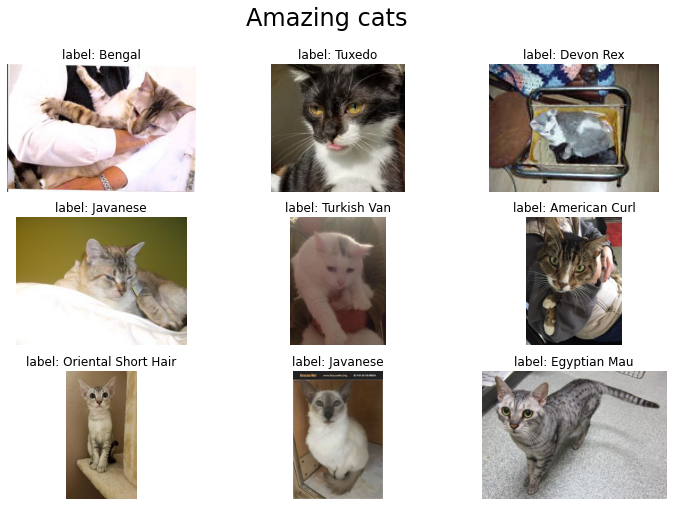

In [5]:
plt.figure(figsize=(12,8))
plt.suptitle("Amazing cats", size=24)
random_breeds = random.choices(breeds, k=9)
for index, breed in enumerate(random_breeds):
    images = os.listdir(CAT_IMAGE_PATH + '/' + breed)
    image_path = random.sample(images, k=1)
    im = PIL.Image.open(CAT_IMAGE_PATH + '/' + breed + "/" + image_path[0])
    plt.subplot(3,3, index+1)
    plt.imshow(im)
    plt.title('label: '+breed)
    plt.axis('off')
plt.show()

Images are not clear, and this is good. We can sent user photos to it

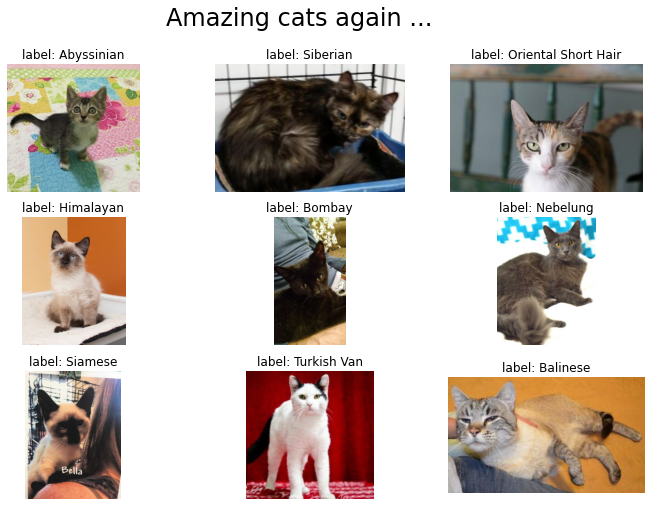

In [6]:
plt.figure(figsize=(12,8))
plt.suptitle("Amazing cats again ...", size=24)

random_breeds = random.choices(breeds, k=9)
for index, breed in enumerate(random_breeds):
    images = os.listdir(CAT_IMAGE_PATH + '/' + breed)
    image_path = random.sample(images, k=1)
    im = PIL.Image.open(CAT_IMAGE_PATH + '/' + breed + "/" + image_path[0])
    plt.subplot(3,3, index+1)
    plt.imshow(im)
    plt.title('label: '+breed)
    plt.axis('off')
plt.show()

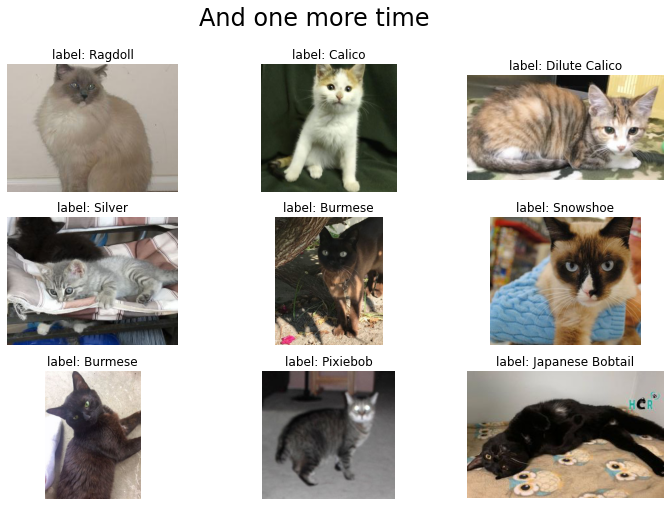

In [9]:
plt.figure(figsize=(12,8))
plt.suptitle("And one more time ", size=24)

random_breeds = random.choices(breeds, k=9)
for index, breed in enumerate(random_breeds):
    images = os.listdir(CAT_IMAGE_PATH + '/' + breed)
    image_path = random.sample(images, k=1)
    im = PIL.Image.open(CAT_IMAGE_PATH + '/' + breed + "/" + image_path[0])
    plt.subplot(3,3, index+1)
    plt.imshow(im)
    plt.title('label: '+breed)
    plt.axis('off')
plt.show()

# Let's have a look on a non-cat images
But is's may be not so fun

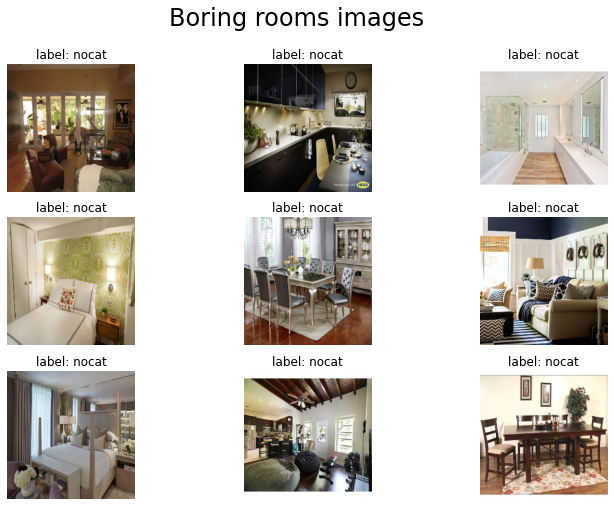

In [10]:
plt.figure(figsize=(12,8))
plt.suptitle("Boring rooms images", size=24)

rooms = os.listdir(ROOM_IMAGE_PATH)
random_rooms = random.choices(rooms, k=9)
for index, room in enumerate(random_rooms):
    images = os.listdir(ROOM_IMAGE_PATH + '/' + room)
    image_path = random.sample(images, k=1)
    im = PIL.Image.open(ROOM_IMAGE_PATH + '/' + room + "/" + image_path[0])
    plt.subplot(3,3, index+1)
    plt.imshow(im)
    plt.title('label: nocat')
    plt.axis('off')
plt.show()

# Combine all items to one folder

In [11]:
def copy_images_to_dir(src, dst):
    os.makedirs(dst)
    subfolders = os.listdir(src)
    for folder in subfolders:
        for i, file in enumerate(os.listdir(src + '/' + folder)):
            if i > 4000:
                break
            shutil.copy(
                src + '/' + folder + '/' + file,
                dst
            )

In [12]:
os.makedirs(IMAGES_DIR)
copy_tree(
    CAT_IMAGE_PATH,
    IMAGES_DIR
)
copy_images_to_dir(
    ROOM_IMAGE_PATH,
    IMAGES_DIR + '/nocat'
)

In [13]:
totalnum = 0
breeds_size = {}
breeds = os.listdir(IMAGES_DIR)
print(f"We have {len(breeds)} breeds")

for breed in breeds:
    images = os.listdir(IMAGES_DIR + f"/{breed}")
    totalnum += len(images)
    breeds_size[breed] = len(images)
    
print(f"total images: {totalnum}")

print()
for key, value in sorted(breeds_size.items(), key=lambda x:x[1], reverse=True):
    print(f"{key}: {value}")

We have 68 breeds
total images: 131857

Domestic Short Hair: 53027
Domestic Medium Hair: 5482
American Shorthair: 5295
nocat: 5250
Domestic Long Hair: 4499
Persian: 4018
Tortoiseshell: 3963
Calico: 3468
Torbie: 3396
Dilute Calico: 3230
Tuxedo: 3181
Dilute Tortoiseshell: 3152
Tabby: 3012
Siamese: 2888
Ragdoll: 2669
Bengal: 2477
Tiger: 2256
Manx: 2059
Russian Blue: 1870
Bombay: 1835
Snowshoe: 1625
Maine Coon: 1418
Himalayan: 1301
Extra-Toes Cat - Hemingway Polydactyl: 1184
American Bobtail: 991
Turkish Van: 815
Turkish Angora: 750
Norwegian Forest Cat: 580
British Shorthair: 567
Oriental Short Hair: 491
Exotic Shorthair: 471
Scottish Fold: 380
Burmese: 344
Egyptian Mau: 305
Tonkinese: 260
Abyssinian: 255
Balinese: 254
Birman: 227
Sphynx - Hairless Cat: 209
Siberian: 189
Havana: 184
Munchkin: 181
Cornish Rex: 171
American Curl: 149
Nebelung: 148
Applehead Siamese: 135
Ragamuffin: 134
Japanese Bobtail: 127
Devon Rex: 119
Ocicat: 118
Pixiebob: 111
Oriental Tabby: 101
Silver: 94
Chartreux: 8

# Prepare image generators

In [29]:
train_datagen = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    validation_split=VAL_SPLIT, # set validation split
    vertical_flip=True)

In [35]:
train_generator = train_datagen.flow_from_directory(
    directory=IMAGES_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True, 
    seed=RANDOM_SEED,
    subset='training') # set as training data



Found 112107 images belonging to 68 classes.


In [36]:
test_generator = train_datagen.flow_from_directory(
    directory=IMAGES_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True, 
    seed=RANDOM_SEED,
    subset='validation') # set as training data

Found 19750 images belonging to 68 classes.


# Creating model

In [37]:
def get_model():
    base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape = input_shape)
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    predictions = Dense(CLASS_NUM, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=LR), metrics=["accuracy"])
    
    return model
    

In [38]:
model = get_model()

In [43]:
checkpoint = ModelCheckpoint('model{epoch:02d}-{val_accuracy:.2f}.hdf5' , monitor = 'val_accuracy' , verbose = 1  , mode = 'max', save_best_only=True)
callbacks_list = [checkpoint]

In [44]:
history = model.fit(
        train_generator,
        steps_per_epoch = len(train_generator),
        validation_data = test_generator, 
        validation_steps = len(test_generator),
        epochs = EPOCHS,
        callbacks = callbacks_list
)

Epoch 1/5
1752/1752 [==============================] - 1221s 697ms/step - loss: 1.6842 - accuracy: 0.5417 - val_loss: 1.6140 - val_accuracy: 0.5487

Epoch 00001: val_accuracy improved from -inf to 0.54871, saving model to model01-0.55.hdf5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/5
1752/1752 [==============================] - 1209s 690ms/step - loss: 1.5693 - accuracy: 0.5620 - val_loss: 1.5645 - val_accuracy: 0.5550

Epoch 00002: val_accuracy improved from 0.54871 to 0.55504, saving model to model02-0.56.hdf5
Epoch 3/5
1752/1752 [==============================] - 1214s 693ms/step - loss: 1.4766 - accuracy: 0.5820 - val_loss: 1.5713 - val_accuracy: 0.5523

Epoch 00003: val_accuracy did not improve from 0.55504
Epoch 4/5
1752/1752 [==============================] - 1213s 692ms/step - loss: 1.3947 - accuracy: 0.5986 - val_loss: 1.5622 - val_accuracy: 0.5556

Epoch 00004: val_accuracy improved from 0.55504 to 0.55559, saving model to model04-0.56.hdf5
Epoch 5/5
1752/1752 [==============================] - 1229s 701ms/step - loss: 1.3114 - accuracy: 0.6163 - val_loss: 1.5814 - val_accuracy: 0.5548

Epoch 00005: val_accuracy did not improve from 0.55559


# Analyze results

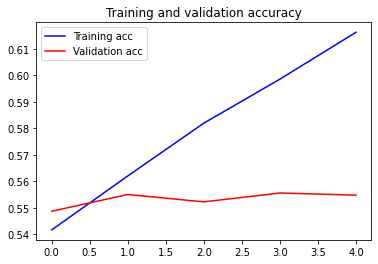

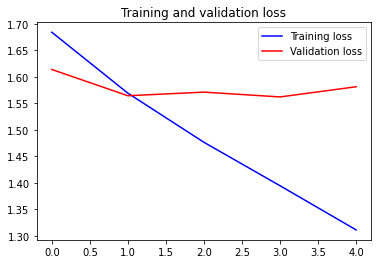

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()